In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.metrics import silhouette_score

In [183]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [5]:
df = pd.read_csv("data/OnlineRetail.csv")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Question number 1 show the top 7 and last 12 records

In [9]:
# This line of code sortes the dataframe by the invoice date
df = df.sort_values("InvoiceDate")

In [10]:
# this displays the top 7 records in the dataframe 
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
50806,540558,21258,?,-29,1/10/2011 10:04,0.00,NaN,United Kingdom
50807,C540559,21888,BINGO SET,-4,1/10/2011 10:07,3.75,NaN,EIRE
50808,540560,21589,NaN,-14,1/10/2011 10:08,0.00,NaN,United Kingdom
50828,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/2011 10:32,0.85,13004.0,United Kingdom
50815,540561,21232,STRAWBERRY CERAMIC TRINKET BOX,12,1/10/2011 10:32,1.25,13004.0,United Kingdom
50816,540561,84580,MOUSE TOY WITH PINK T-SHIRT,4,1/10/2011 10:32,3.75,13004.0,United Kingdom
50817,540561,22355,CHARLOTTE BAG SUKI DESIGN,10,1/10/2011 10:32,0.85,13004.0,United Kingdom


In [11]:
# this displays the last 12 records in the dataframe 
df.tail(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
332542,566079,23396,LA JARDIN BOTANIQUE CUSHION COVER,4,9/9/2011 9:52,3.75,17593.0,United Kingdom
332543,566079,23395,BELLE JARDINIERE CUSHION COVER,4,9/9/2011 9:52,3.75,17593.0,United Kingdom
332544,566079,23403,LETTER HOLDER HOME SWEET HOME,4,9/9/2011 9:52,3.75,17593.0,United Kingdom
332545,566079,23425,STORAGE TIN HOME SWEET HOME,6,9/9/2011 9:52,2.49,17593.0,United Kingdom
332546,566079,23432,PRETTY HANGING QUILTED HEARTS,72,9/9/2011 9:52,0.83,17593.0,United Kingdom
332547,566079,20839,FRENCH PAISLEY CUSHION COVER,12,9/9/2011 9:52,0.85,17593.0,United Kingdom
332572,566079,22924,FRIDGE MAGNETS LA VIE EN ROSE,24,9/9/2011 9:52,0.85,17593.0,United Kingdom
332549,566079,20838,FRENCH LATTICE CUSHION COVER,12,9/9/2011 9:52,0.85,17593.0,United Kingdom
332550,566079,22400,MAGNETS PACK OF 4 HOME SWEET HOME,24,9/9/2011 9:52,0.39,17593.0,United Kingdom
332551,566079,22396,MAGNETS PACK OF 4 RETRO PHOTO,24,9/9/2011 9:52,0.39,17593.0,United Kingdom


### Question 2 droping rows without customer ids

In [15]:
# checking How many nan values are they for the CustomerID column
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
50806,540558,21258,?,-29,1/10/2011 10:04,0.00,NaN,United Kingdom
50807,C540559,21888,BINGO SET,-4,1/10/2011 10:07,3.75,NaN,EIRE
50808,540560,21589,NaN,-14,1/10/2011 10:08,0.00,NaN,United Kingdom
50849,540564,22617,"mouldy, thrown away.",-2600,1/10/2011 10:36,0.00,NaN,United Kingdom
51048,540637,21275,NaN,-5,1/10/2011 12:13,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
334029,566221,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,1,9/9/2011 16:13,5.79,NaN,United Kingdom
334030,566221,22195,LARGE HEART MEASURING SPOONS,1,9/9/2011 16:13,3.29,NaN,United Kingdom
334023,566221,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,9/9/2011 16:13,5.79,NaN,United Kingdom
334053,566224,84968A,SET OF 16 VINTAGE ROSE CUTLERY,1,9/9/2011 17:52,12.75,NaN,United Kingdom


In [13]:
df.CustomerID.isna().value_counts()

False    406829
True     135080
Name: CustomerID, dtype: int64

- there are 135,080 rows with no customer ids

In [35]:
df.dropna(subset=["CustomerID"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
50828,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/2011 10:32,0.85,13004.0,United Kingdom,20.40
50815,540561,21232,STRAWBERRY CERAMIC TRINKET BOX,12,1/10/2011 10:32,1.25,13004.0,United Kingdom,15.00
50816,540561,84580,MOUSE TOY WITH PINK T-SHIRT,4,1/10/2011 10:32,3.75,13004.0,United Kingdom,15.00
50817,540561,22355,CHARLOTTE BAG SUKI DESIGN,10,1/10/2011 10:32,0.85,13004.0,United Kingdom,8.50
50818,540561,22356,CHARLOTTE BAG PINK POLKADOT,10,1/10/2011 10:32,0.85,13004.0,United Kingdom,8.50
...,...,...,...,...,...,...,...,...,...
332549,566079,20838,FRENCH LATTICE CUSHION COVER,12,9/9/2011 9:52,0.85,17593.0,United Kingdom,10.20
332550,566079,22400,MAGNETS PACK OF 4 HOME SWEET HOME,24,9/9/2011 9:52,0.39,17593.0,United Kingdom,9.36
332551,566079,22396,MAGNETS PACK OF 4 RETRO PHOTO,24,9/9/2011 9:52,0.39,17593.0,United Kingdom,9.36
332571,566079,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,24,9/9/2011 9:52,0.85,17593.0,United Kingdom,20.40


In [19]:
# droping all empty customer ids
df.dropna(subset=["CustomerID"], inplace=True)

### Question 3 creating a new feature

In [20]:
# adding a new feature by multypling the Quatitiy and unitPrice columns
df["SaleValue"] = df["Quantity"] * df["UnitPrice"]

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
50828,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/2011 10:32,0.85,13004.0,United Kingdom,20.4
50815,540561,21232,STRAWBERRY CERAMIC TRINKET BOX,12,1/10/2011 10:32,1.25,13004.0,United Kingdom,15.0
50816,540561,84580,MOUSE TOY WITH PINK T-SHIRT,4,1/10/2011 10:32,3.75,13004.0,United Kingdom,15.0
50817,540561,22355,CHARLOTTE BAG SUKI DESIGN,10,1/10/2011 10:32,0.85,13004.0,United Kingdom,8.5
50818,540561,22356,CHARLOTTE BAG PINK POLKADOT,10,1/10/2011 10:32,0.85,13004.0,United Kingdom,8.5


### Question 4 Caluculate the Recency Value, Frequency value and Monetary value

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 50828 to 332548
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   SaleValue    406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
50828,540561,21385,IVORY HANGING DECORATION HEART,24,1/10/2011 10:32,0.85,13004.0,United Kingdom,20.4
50815,540561,21232,STRAWBERRY CERAMIC TRINKET BOX,12,1/10/2011 10:32,1.25,13004.0,United Kingdom,15.0
50816,540561,84580,MOUSE TOY WITH PINK T-SHIRT,4,1/10/2011 10:32,3.75,13004.0,United Kingdom,15.0
50817,540561,22355,CHARLOTTE BAG SUKI DESIGN,10,1/10/2011 10:32,0.85,13004.0,United Kingdom,8.5
50818,540561,22356,CHARLOTTE BAG PINK POLKADOT,10,1/10/2011 10:32,0.85,13004.0,United Kingdom,8.5


In [47]:
df["date"] = pd.to_datetime(df["InvoiceDate"])

In [106]:
df["Customer"] = df["CustomerID"]

In [48]:
df.date.min()

Timestamp('2010-12-01 08:26:00')

In [49]:
df.date.max()

Timestamp('2011-12-09 12:50:00')

In [63]:
df["Recency"] = pd.to_datetime("2011-12-09 12:50:00") - df["date"]

In [231]:
str(df["Recency"][0])[0:3]

'373'

In [235]:
df["Recency"] = df.apply(lambda x: int(str(x.Recency)[0:2]), axis=1)

In [236]:
df.groupby(by=["CustomerID"]).agg(
    {"Recency": "last",
     "Customer":"count",
     "SaleValue":"sum"}).reset_index()

,CustomerID,Recency,Customer,SaleValue
0,12346.0,32,2,0.00
1,12347.0,12,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,30,17,334.40
...,...,...,...,...
4367,18280.0,27,10,180.60
4368,18281.0,18,7,80.82
4369,18282.0,12,13,176.60
4370,18283.0,95,756,2094.88


In [261]:
grouped_df = df.groupby(by=["CustomerID"]).agg(
    {"Recency": "last",
     "Customer":lambda x: x.count()/365,
     "SaleValue": "mean"}).reset_index().rename({'Customer': "Frequency", "SaleValue":"Monetary"}, axis=1)

In [262]:
grouped_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,32,0.005479,0.000000
1,12347.0,12,0.498630,23.681319
2,12348.0,74,0.084932,57.975484
3,12349.0,18,0.200000,24.076027
4,12350.0,30,0.046575,19.670588


In [263]:
scale = MinMaxScaler()
X = grouped_df
X = scale.fit_transform(X)

In [264]:
df.Description.nunique()

3896

In [265]:
df.StockCode.nunique()

3684

In [266]:
df.Country.unique()

array(['United Kingdom', 'Germany', 'France', 'Spain', 'Australia',
       'Cyprus', 'Belgium', 'Italy', 'Netherlands', 'EIRE', 'Poland',
       'Portugal', 'Switzerland', 'Finland', 'Greece', 'Singapore',
       'Iceland', 'Lebanon', 'Channel Islands', 'Sweden', 'Japan', 'USA',
       'Denmark', 'Norway', 'RSA', 'Austria', 'Israel', 'Czech Republic',
       'Malta', 'Lithuania', 'United Arab Emirates', 'Saudi Arabia',
       'Canada', 'Unspecified', 'Brazil', 'European Community', 'Bahrain'],
      dtype=object)

In [267]:
df.Country.nunique()

37

### Question 5 Clustering

In [163]:
# I tried to use the elbow method to get the best number of clusters but I didn't get so I choose the one based on my choice
wcss = []
for i in range(1,11):
    kmeans = k_means(X, init="k-means++", n_clusters=i)
    # print(kmeans)
    wcss.append(k_means.inertia())
plt.plot(x)
wcss

AttributeError: 'function' object has no attribute 'inertia'

In [268]:
kmeans = k_means(X, init="k-means++", n_clusters=5)

In [226]:
kmeans[1].reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [3],
       [0]], dtype=int32)

In [258]:
silhouette_score(kmeans, labels=["Group_1", "Group_2", "Group_3", "Group_4", "Group_5"])

/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)


ValueError: Expected 2D array, got 1D array instead:
array=[array([[1.29306630e+04, 4.19558011e+01, 2.47235299e-01, 3.11442449e+01],
        [1.65213483e+04, 4.14925029e+01, 2.35682799e-01, 3.11564736e+01],
        [1.53439805e+04, 3.94873853e+01, 2.54552595e-01, 2.93495614e+01],
        [1.77055575e+04, 3.89518779e+01, 2.58122709e-01, 2.82671984e+01],
        [1.41539338e+04, 4.06495434e+01, 2.79251892e-01, 2.42117482e+01]])
 array([0, 0, 0, ..., 3, 3, 3], dtype=int32) 585581711.7783239].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Question 6 add the three scores and assign it to OverallScore

In [269]:
grouped_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,32,0.005479,0.000000
1,12347.0,12,0.498630,23.681319
2,12348.0,74,0.084932,57.975484
3,12349.0,18,0.200000,24.076027
4,12350.0,30,0.046575,19.670588


In [270]:
grouped_df["OverallScore"] = (grouped_df["Frequency"] + grouped_df["Monetary"] + grouped_df["Recency"])/3


### Question 7 Plots

<AxesSubplot:title={'center':'Frequency vs OverallScore'}, xlabel='Frequency'>

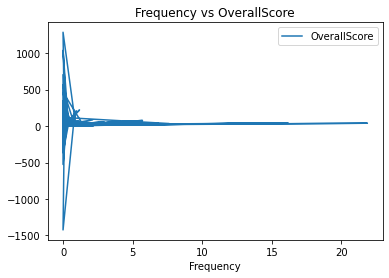

In [271]:
grouped_df.plot.line(x="Frequency", y="OverallScore", title="Frequency vs OverallScore")

<AxesSubplot:title={'center':'Rencency vs OverallScore'}, xlabel='Recency'>

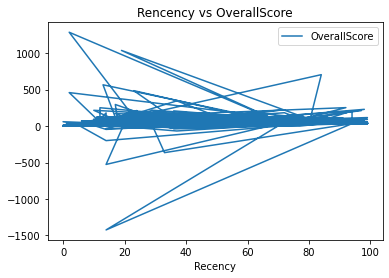

In [273]:
grouped_df.plot.line(x="Recency", y="OverallScore", title="Rencency vs OverallScore")

<AxesSubplot:title={'center':'Monetary vs OverallScore'}, xlabel='Monetary'>

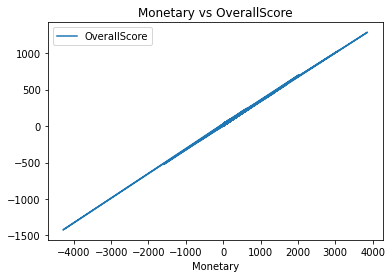

In [274]:
grouped_df.plot.line(x="Monetary", y="OverallScore", title="Monetary vs OverallScore")

### Question 8 assinging a label and saving it to a dataframe

In [275]:
grouped_df.head()

,CustomerID,Recency,Frequency,Monetary,OverallScore
0,12346.0,32,0.005479,0.000000,10.668493
1,12347.0,12,0.498630,23.681319,12.059983
2,12348.0,74,0.084932,57.975484,44.020138
3,12349.0,18,0.200000,24.076027,14.092009
4,12350.0,30,0.046575,19.670588,16.572388


In [276]:
def assign_labels(overallscore: int) -> str:
    """ a fuction that assigns labels for values depending on the overallscore"""
    if overallscore > 3:
        label = "Mid Value"
    elif overallscore > 7:
        label = "High Vale"
    else:
        label = "low value"
    
    return label


grouped_df["Segment"] = grouped_df.apply(lambda x: assign_labels(x.OverallScore), axis=1)

In [277]:
grouped_df.head()

,CustomerID,Recency,Frequency,Monetary,OverallScore,Segment
0,12346.0,32,0.005479,0.000000,10.668493,Mid Value
1,12347.0,12,0.498630,23.681319,12.059983,Mid Value
2,12348.0,74,0.084932,57.975484,44.020138,Mid Value
3,12349.0,18,0.200000,24.076027,14.092009,Mid Value
4,12350.0,30,0.046575,19.670588,16.572388,Mid Value


In [278]:
df.to_csv("Customer_Segmentation_Analysis.csv", index=False)